# Building A Neural Network Based Classifier FOr Predicting Drug Response From Single-Cell Expression Profiles Of Tumours

## Exploratory Data Analysis

Importing the needed libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scanpy as sc

<b>Getting our three datasets:</b>

drug_sensitivity -> the potency of each cell line in GDSC2 towards the includes drugs

expression -> the correlation matrix between the cell lines and the genes

test_data -> the data on which we are going to test our model later on, correlation between cells and genes

In [199]:
drug_sensitivity = pd.read_csv('data/drug_sensitivity_GDSC2.csv')
expression = pd.read_csv('data/expression_profiles.csv')
test_data = sc.read_h5ad('data/test_data.h5ad')

Preview:

789 rows of cell lines and 30255 columns of drugs

In [200]:
drug_sensitivity

,Unnamed: 0,(+)-CAMPTOTHECIN (GDSC2:1003) 0.1μM rep1,PD 0325901 (GDSC2:1060) 0.25μM rep1,ENTINOSTAT (GDSC2:1593) 10.0μM rep1,BERZOSERTIB (GDSC2:1613) 5.0μM rep1,WZ 4003 (GDSC2:1614) 10.0μM rep1,CZC24832 (GDSC2:1615) 10.0μM rep1,AOB5560 (GDSC2:1617) 10.0μM rep1,AK175551 (GDSC2:1618) 10.0μM rep1,AOB2221 (GDSC2:1620) 10.0μM rep1,...,KU-57788 (GDSC2:1038) 5.0μM rep35,KU-57788 (GDSC2:1038) 10.0μM rep35,KU-57788 (GDSC2:1038) 2.5μM rep36,KU-57788 (GDSC2:1038) 5.0μM rep36,KU-57788 (GDSC2:1038) 10.0μM rep36,GSK 269962A (GDSC2:1192) 0.0390625μM rep5,GSK 269962A (GDSC2:1192) 0.0390625μM rep6,ENTINOSTAT (GDSC2:1593) 0.03125μM rep8,ENTINOSTAT (GDSC2:1593) 0.5μM rep8,RO-3306 (GDSC2:1052) 0.0390625μM rep7
0,ACH-000030,0.508382,0.860545,0.421495,0.394072,0.604432,0.805652,0.128864,0.576986,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACH-000681,0.496826,0.556407,0.455088,0.836621,0.717368,1.000000,0.878329,0.467005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000219,0.074945,0.315650,0.209453,0.945866,0.542237,0.960021,0.818401,0.634279,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000233,0.042049,0.838983,0.022333,0.022333,0.128818,0.988942,0.045992,0.420750,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-002113,0.494725,0.948250,0.633638,0.675729,1.000000,1.000000,0.384880,0.637463,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,ACH-000235,0.635401,0.677973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,ACH-000684,0.677412,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,ACH-000257,0.158619,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,ACH-002269,0.755257,0.891793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1673 rows of cell-lines and 19154 columns of genes.

In [201]:
expression

,Unnamed: 0,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,...,SPDYE11,H3C2,H3C3,DUS4L-BCAP29,C8orf44-SGK3,ELOA3BP,NPBWR1,ELOA3DP,ELOA3P,CDR1
0,ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,...,0.000000,2.689299,0.189034,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
1,ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,...,0.000000,1.286881,1.049631,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
2,ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,...,0.000000,0.594549,1.097611,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
3,ACH-001979,4.240314,0.000000,5.681168,2.063503,1.641546,0.000000,7.236301,5.948367,4.596935,...,0.000000,0.000000,0.000000,1.887525,0.176323,0.000000,0.000000,0.0,0.000000,0.000000
4,ACH-002438,4.032101,0.000000,6.674687,2.117695,3.003602,0.000000,2.169925,6.838195,3.253989,...,0.000000,0.238787,0.378512,1.748461,0.839960,0.000000,0.014355,0.0,0.000000,0.042644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,...,0.056584,2.229588,0.084064,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
1669,ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,...,0.028569,0.189034,0.400538,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
1670,ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,...,0.000000,1.097611,0.400538,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
1671,ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,...,0.000000,0.831877,0.847997,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [202]:
# Rename the first column to 'cell_line' for both dataframes
drug_sensitivity.rename(columns={'Unnamed: 0': 'cell_line'}, inplace=True)
expression.rename(columns={'Unnamed: 0': 'cell_line'}, inplace=True)

Get only the cell lines that are present in both datasets:

In [203]:
cell_lines_drug = drug_sensitivity['cell_line'].unique()
cell_lines_expresssion = expression['cell_line'].unique()
cell_lines = np.intersect1d(cell_lines_drug, cell_lines_expresssion)
drug_sensitivity = drug_sensitivity[drug_sensitivity['cell_line'].isin(cell_lines)]
expression = expression[expression['cell_line'].isin(cell_lines)]
drug_sensitivity.shape[0] == expression.shape[0]

True

### Expression Dataset

We check for missing values:

In [204]:
expression.columns[expression.isna().any()].tolist()

[]

So, we have no missing values.


Next, we find the mean and variance across all cell-lines for each gene.

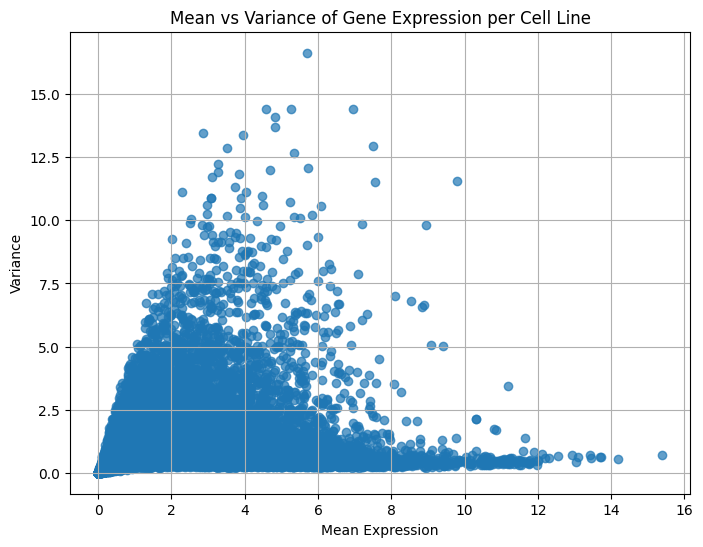

In [205]:
mean_expression = expression.iloc[:, 1:].mean(axis=0)
variance_expression = expression.iloc[:, 1:].var(axis=0)
plt.figure(figsize=(8, 6))
plt.scatter(mean_expression, variance_expression, alpha=0.7)
plt.xlabel('Mean Expression')
plt.ylabel('Variance')
plt.title('Mean vs Variance of Gene Expression per Cell Line')
plt.grid(True)
plt.show()

What we do here is plot the mean expression of all genes against their variance to determine which genes are not that highly expressed and are not needed for our purposes. 

To do that, we have take a look at the density plots of the mean and the variance.

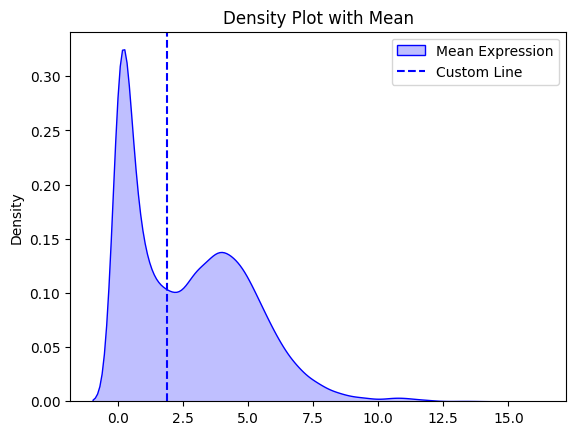

In [227]:
sns.kdeplot(mean_expression, label='Mean Expression', color='blue', fill=True)
plt.axvline(1.9, color='blue', linestyle='--', label='Custom Line')
plt.legend()
plt.title("Density Plot with Mean")
plt.show()

/var/folders/m2/_4f8g2rn52z18f226hld87380000gn/T/ipykernel_33034/1113894563.py:1: RuntimeWarning: divide by zero encountered in log
  sns.kdeplot(np.log(np.array(variance_expression)), label=' Log of Variance Expression', color='blue', fill=True)


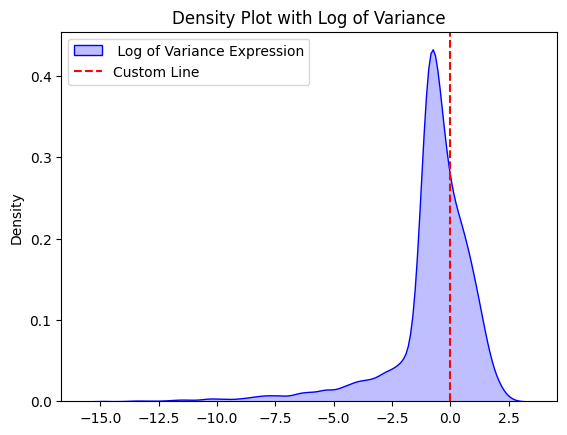

In [228]:
sns.kdeplot(np.log(np.array(variance_expression)), label=' Log of Variance Expression', color='blue', fill=True)
plt.axvline(0, color='red', linestyle='--', label='Custom Line')
plt.legend()
plt.title("Density Plot with Log of Variance")
plt.show()

Here instead, we decided to plot the log(variance) for easier choice of the axis, which we do by hand.

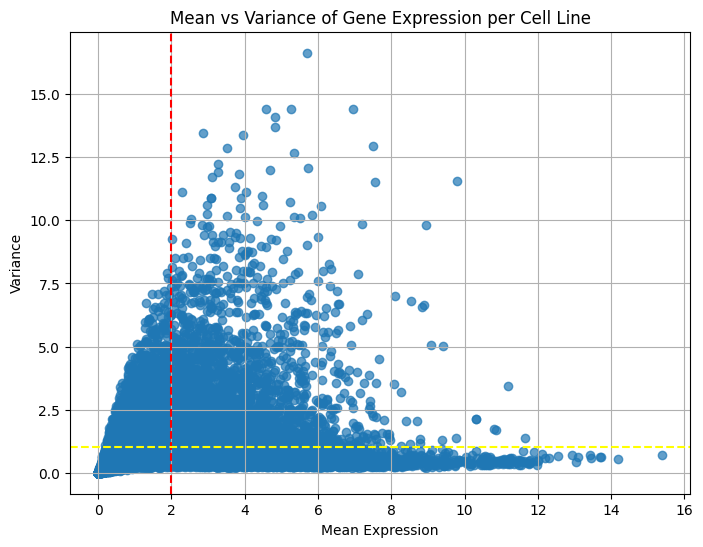

In [208]:
mean_expression = expression.iloc[:, 1:].mean(axis=0)
variance_expression = expression.iloc[:, 1:].var(axis=0)
plt.figure(figsize=(8, 6))
plt.scatter(mean_expression, variance_expression, alpha=0.7)
plt.xlabel('Mean Expression')
plt.ylabel('Variance')
plt.title('Mean vs Variance of Gene Expression per Cell Line')
plt.grid(True)
plt.axvline(x=2, color='r', linestyle='--', label='Mean Threshold')
plt.axhline(y=1, color='yellow', linestyle='--', label='Variance Threshold')
plt.show()

On the plot we can see now the two straight red and yellow lines, which show us what part of the data to cut out, so we can leave only the highly expressed genes for our classifier. We chose these lines based on the density plots of the mean and the variance.

In [209]:
left_genes = set(variance_expression[variance_expression > 1].index).intersection(set(mean_expression[mean_expression > 2].index))
left_genes

{'DDIT3',
 'SPAG1',
 'IFT57',
 'EPCAM',
 'ORAI2',
 'CLGN',
 'ANXA3',
 'DUSP22',
 'KRT18',
 'ELF4',
 'GAA',
 'ARRB2',
 'RNF130',
 'HSPA1A',
 'PIP4P2',
 'ZNF512B',
 'GPR137B',
 'OXR1',
 'GLB1L2',
 'CKMT1B',
 'TMEM131L',
 'FAM114A1',
 'DGKD',
 'HPDL',
 'MT1X',
 'ZNF362',
 'PHLDA3',
 'MFSD6',
 'TRPS1',
 'ENPP4',
 'ASIC1',
 'RUNX1',
 'KHK',
 'LDLRAD3',
 'ZDHHC14',
 'CCNJL',
 'GJC1',
 'HS6ST1',
 'ACTA2',
 'TRIM59',
 'CLYBL',
 'SHB',
 'COPZ2',
 'PCGF2',
 'NFIC',
 'SATB2',
 'MFSD3',
 'SYTL2',
 'SLC26A11',
 'SCD5',
 'SCARB1',
 'ST14',
 'ALPK1',
 'AMOTL2',
 'DENND2B',
 'IQANK1',
 'LPCAT1',
 'TNFSF13',
 'MSI2',
 'PLEKHA7',
 'PKP2',
 'MAP3K6',
 'SLC18B1',
 'ANKH',
 'ERAP1',
 'RAB3D',
 'RUSC2',
 'CPT1A',
 'TIMP3',
 'SEPTIN6',
 'OSR2',
 'GPC1',
 'IL27RA',
 'MARCKS',
 'THRA',
 'ABHD17C',
 'IRF6',
 'SECTM1',
 'PLCG1',
 'RAC3',
 'GSTO1',
 'H2BC21',
 'ABCC3',
 'CAMK1',
 'DNMBP',
 'GSDMB',
 'LOX',
 'CYB561',
 'SH2B3',
 'TANC2',
 'NPIPA5',
 'IKBIP',
 'CD55',
 'CALHM2',
 'RAB40B',
 'PIMREG',
 'KLHL9',
 'MO

In [210]:
final_expression = expression.loc[:, expression.columns.isin(left_genes)]
final_expression = pd.concat([expression[['cell_line']], final_expression], axis=1)
final_expression.sort_values(by='cell_line', inplace=True)
final_expression.reset_index(drop=True, inplace=True)
final_expression

,cell_line,TSPAN6,FUCA2,GCLC,ENPP4,SEMA3F,CD99,ICA1,DBNDD1,CFLAR,...,PRAG1,ARHGAP23,UHRF1,F8A3,PCGF2,MARCKS,RDM1,UPK3BL2,NOTCH2NLB,NOTCH2NLC
0,ACH-000001,5.183487,5.722193,4.676944,2.841973,4.112700,4.810443,4.216455,4.042644,3.857981,...,2.558268,4.381975,4.388878,1.214125,3.920293,5.047451,1.646163,2.601697,1.823749,2.077243
1,ACH-000002,0.176323,4.134221,4.111866,0.918386,0.201634,5.098453,2.713696,0.111031,4.574707,...,1.070389,2.226509,4.800123,3.003602,0.163499,2.987321,0.799087,3.237258,2.655352,2.680324
2,ACH-000004,2.176323,3.949535,4.877253,2.733354,1.014355,6.343941,4.891905,0.443607,5.255501,...,0.028569,0.263034,4.879216,3.307429,4.479619,0.176323,2.280956,2.891419,2.568032,3.168321
3,ACH-000006,0.097611,5.300124,4.835419,0.028569,2.704872,6.699746,2.361768,0.903038,5.779522,...,1.819668,2.307429,6.466953,1.084064,2.163499,2.017922,1.526069,1.906891,1.992768,2.580145
4,ACH-000007,3.350497,5.630231,4.968552,3.005400,1.416840,7.124742,6.246408,3.742006,3.485427,...,3.766595,2.611172,4.578939,1.713696,2.790772,3.672425,1.521051,2.140779,0.201634,0.839960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,ACH-001716,4.866413,4.387500,4.634593,0.238787,2.238787,5.671293,1.405992,4.049631,0.014355,...,2.584963,3.070389,5.425929,1.944858,4.945327,6.842853,0.000000,3.000000,0.000000,1.090853
604,ACH-002170,3.200065,4.758623,8.098769,6.051590,0.594549,5.298658,6.600210,2.543496,4.226509,...,1.077243,4.942515,0.367371,0.000000,3.837943,5.806066,0.000000,0.495695,0.344828,1.021480
605,ACH-002214,0.014355,6.371210,4.493775,3.711495,0.070389,0.097611,1.333424,0.014355,7.138016,...,0.000000,4.320485,4.401221,0.056584,2.780310,0.014355,0.000000,1.490570,4.519793,4.569248
606,ACH-002290,0.000000,3.840967,4.474436,0.000000,0.014355,5.903520,0.028569,0.214125,4.259272,...,2.310340,3.282440,7.006410,3.264536,0.495695,0.014355,0.000000,4.144862,0.584963,1.438293


We are also going to bin our data to improve our future model accuracy and simplify the analysis.

In [211]:
for col in final_expression.columns[1:]:
    final_expression[col] = pd.qcut(final_expression[col], q=20, labels=False, duplicates='drop')
final_expression

,cell_line,TSPAN6,FUCA2,GCLC,ENPP4,SEMA3F,CD99,ICA1,DBNDD1,CFLAR,...,PRAG1,ARHGAP23,UHRF1,F8A3,PCGF2,MARCKS,RDM1,UPK3BL2,NOTCH2NLB,NOTCH2NLC
0,ACH-000001,18,10,10,14,15,2,12,12,3,...,10,12,3,6,7,11,6,9,9,7
1,ACH-000002,2,3,4,5,1,2,9,0,8,...,3,4,5,13,0,3,1,13,14,12
2,ACH-000004,3,2,11,12,5,6,14,1,13,...,0,0,6,14,13,0,11,11,13,15
3,ACH-000006,1,6,11,1,11,7,8,2,16,...,6,4,17,5,1,2,5,4,9,12
4,ACH-000007,7,9,12,15,6,10,18,11,2,...,16,5,4,7,2,5,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,ACH-001716,17,3,9,3,9,3,5,12,0,...,10,7,10,8,16,19,0,11,0,1
604,ACH-002170,6,4,19,19,3,2,19,6,5,...,3,14,0,0,6,15,0,0,1,1
605,ACH-002214,0,16,8,18,0,0,5,0,19,...,0,12,3,0,2,0,0,2,19,19
606,ACH-002290,0,2,8,0,0,4,0,1,6,...,8,7,19,14,0,0,0,18,1,2


### Drug Sensitivity Dataset

We know want to find a drug that has the least missing potency values for all cell lines on which we can train our classifier:

In [212]:
drug_sensitivity = drug_sensitivity.reset_index(drop=True)
drug_sensitivity.isna().sum().sort_values(ascending=True)

cell_line                                             0
(+)-CAMPTOTHECIN (GDSC2:1003) 0.1μM rep1              1
FLUOROURACIL (GDSC2:1073) 20.0μM rep1                 3
ASP-7487 (GDSC2:1510) 10.0μM rep1                     3
ALPELISIB (GDSC2:1560) 5.0μM rep1                     4
                                                   ... 
AGI-6780 (GDSC2:1634) 0.0316366632677971μM rep13    608
AK175558 (GDSC2:1627) 0.0010005269850663μM rep13    608
WEHI-539 (GDSC2:1997) 10.0μM rep21                  608
MN-64 (GDSC2:1854) 0.0100052698506632μM rep11       608
RO-3306 (GDSC2:1052) 0.0390625μM rep7               608
Length: 30255, dtype: int64

It is "(+)-CAMPTOTHECIN (GDSC2:1003) 0.1μM rep1" and it has one missing value. Since it is just one, it is convinient for us to remove it.

In [213]:
missing_indices = drug_sensitivity[drug_sensitivity['(+)-CAMPTOTHECIN (GDSC2:1003) 0.1μM rep1'].isna()].index
drug_sensitivity.drop(index=missing_indices, inplace=True)
final_expression.drop(index=missing_indices, inplace=True)
drug_sensitivity.reset_index(drop=True, inplace=True)
final_expression.reset_index(drop=True, inplace=True)
drug_sensitivity.shape[0] == final_expression.shape[0]

True

### Test Cells Dataset

We take a look now here on the dataset on which we are going to use our classifer later to test how it works on single cells. Later, when building the classifer, we divide our data into 95% training and 5% test data, and we want to check for that 5% of cell-lines how our model predicts the drug sensitivity of the cells that are contained in these cell-lines.

Therefore, I will also extract the common genes we have in the final_expression and test_data datasets so that later our model can be trained on genes that also come up in the test data.

In [214]:
# Basic overview: number of cells and genes
print(f"Number of cells: {test_data.n_obs}")
print(f"Number of genes: {test_data.n_vars}")

# Show first few rows of the expression matrix (optional)
print(test_data.X[:5, :5])

# Explore metadata (obs) columns
print(test_data.obs.head())

# Explore gene metadata (var)
print(test_data.var.head())

Number of cells: 1136
Number of genes: 22722
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
                         Cell_Line
AAAGTAGCAATCTGCA-3-22  SKMEL2_SKIN
AAAGTAGCATGAAGTA-3-22  SKMEL2_SKIN
AACTCAGCACGCATCG-3-22  SKMEL2_SKIN
AAGCCGCGTCCGTTAA-3-22  SKMEL2_SKIN
AAGGAGCGTATGAAAC-3-22  SKMEL2_SKIN
Empty DataFrame
Columns: []
Index: [RP11-34P13.7, AP006222.2, RP4-669L17.10, RP4-669L17.2, RP5-857K21.2]


In [215]:
test_data.obs['Cell_Line']

AAAGTAGCAATCTGCA-3-22                       SKMEL2_SKIN
AAAGTAGCATGAAGTA-3-22                       SKMEL2_SKIN
AACTCAGCACGCATCG-3-22                       SKMEL2_SKIN
AAGCCGCGTCCGTTAA-3-22                       SKMEL2_SKIN
AAGGAGCGTATGAAAC-3-22                       SKMEL2_SKIN
                                      ...              
c4745                    SCC9_UPPER_AERODIGESTIVE_TRACT
c4752                    SCC9_UPPER_AERODIGESTIVE_TRACT
c4789                    SCC9_UPPER_AERODIGESTIVE_TRACT
c4800                    SCC9_UPPER_AERODIGESTIVE_TRACT
c4812                    SCC9_UPPER_AERODIGESTIVE_TRACT
Name: Cell_Line, Length: 1136, dtype: category
Categories (4, object): ['MKN45_STOMACH', 'NCIH1435_LUNG', 'SCC9_UPPER_AERODIGESTIVE_TRACT', 'SKMEL2_SKIN']

We have the 4 overlapping cell-lines: ['MKN45_STOMACH', 'NCIH1435_LUNG', 'SCC9_UPPER_AERODIGESTIVE_TRACT', 'SKMEL2_SKIN'], and we have to divide our test data into 4 dataframes for each cell-line.

DepMap Portal ID: 

MKN45_STOMACH -> ACH-000356

NCIH1435_LUNG -> ACH-000852

SCC9_UPPER_AERODIGESTIVE_TRACT -> ACH-000181

SKMEL2_SKIN -> ACH-001190

In [216]:
MKN_data = test_data[test_data.obs['Cell_Line'] == 'MKN45_STOMACH'].to_df()
NCIH_data = test_data[test_data.obs['Cell_Line'] == 'NCIH1435_LUNG'].to_df()
SCC_data = test_data[test_data.obs['Cell_Line'] == 'SCC9_UPPER_AERODIGESTIVE_TRACT'].to_df()
SKMEL_data = test_data[test_data.obs['Cell_Line'] == 'SKMEL2_SKIN'].to_df()

Let's find the overlapping genes from all cell-lines in our dataset and the final_expression dataset.

In [217]:
test_data_df = test_data.to_df()
same_genes = set(final_expression.columns).intersection(set(test_data_df.columns))
len(same_genes)

2855

We have 2855 overlapping genes, so we are going to use only them.

In [218]:
test_data_df = test_data_df.loc[:, test_data_df.columns.isin(same_genes)]
final_expression = pd.concat([final_expression['cell_line'], final_expression.loc[:, final_expression.columns.isin(same_genes)]], axis=1)

In [219]:
MKN_data = MKN_data.loc[:, MKN_data.columns.isin(same_genes)]
NCIH_data = NCIH_data.loc[:, NCIH_data.columns.isin(same_genes)]
SCC_data = SCC_data.loc[:, SCC_data.columns.isin(same_genes)]
SKMEL_data = SKMEL_data.loc[:, SKMEL_data.columns.isin(same_genes)]

And now let's bin them as well, the same way we did for the final_expression.

In [220]:
cell_lines = [MKN_data, NCIH_data, SCC_data, SKMEL_data]

for cell_line in cell_lines:
    for col in cell_line.columns:
        cell_line[col] = pd.qcut(cell_line[col], q=20, labels=False, duplicates='drop')


In [221]:
MKN_data

,HES4,ISG15,AGRN,ACAP3,MXRA8,VWA1,ATAD3B,PRKCZ,TNFRSF14,ARHGEF16,...,CSTB,AGPAT3,PWP2,TRPM2,ADARB1,COL18A1,COL6A1,COL6A2,SPATC1L,C21orf58
AAAGATGGTATGCTTG-13-15,4,2,5,3,0,2,2,0,0,0,...,10,5,0,0,0,0,0,0,2,0
AACTTTCCAGTGAGTG-13-15,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
AAGCCGCTCTTGGGTA-13-15,3,0,3,0,0,6,10,0,0,2,...,14,0,0,3,2,0,2,0,5,3
AGATTGCCATCCGGGT-13-15,0,4,0,0,0,0,0,0,0,0,...,16,0,0,0,0,0,2,0,0,0
AGCGTATTCTCAAGTG-13-15,13,9,0,0,0,9,12,0,0,3,...,13,11,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCCAGGTCTCTCTG-14-15,5,0,2,2,0,0,12,0,0,0,...,15,0,0,0,0,0,0,0,4,2
TTCGGTCGTATTACCG-14-15,7,2,0,0,0,0,8,0,0,0,...,14,4,0,0,0,0,0,0,0,0
TTGACTTAGACTTGAA-14-15,11,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGGTTGTGCACGAA-14-15,0,0,0,0,0,0,5,0,0,0,...,2,0,0,3,0,0,0,0,0,0


In [222]:
MKN_data.fillna(0, inplace=True)
NCIH_data.fillna(0, inplace=True)
SCC_data.fillna(0, inplace=True)
SKMEL_data.fillna(0, inplace=True)

In [223]:
assert not np.isnan(MKN_data.values).any(), "New prediction input contains NaNs!"

And lastly, let's make the genes to be in the same order in the columns' section.

In [224]:
for cell_line in cell_lines:
    cell_line.columns = cell_line[final_expression.columns[1:]].columns

We are ready to export the data!

In [225]:
final_expression.to_csv('processed_data/final_expression.csv', index=False)
drug_sensitivity.to_csv('processed_data/drug_sensitivity.csv', index=False)
MKN_data.to_csv('processed_data/MKN_data.csv', index=False)
NCIH_data.to_csv('processed_data/NCIH_data.csv', index=False)
SCC_data.to_csv('processed_data/SCC_data.csv', index=False)
SKMEL_data.to_csv('processed_data/SKMEL_data.csv', index=False)
